# Coco Api Tutorial

This notebook shows how to use [pycoco api](https://github.com/cocodataset/cocoapi) and create a small test dataset.
The package can be installed from the source cod, by doing

```
pip install cython
git clone git@github.com:cocodataset/cocoapi.git
cd PythonAPI
make
```

or by doing

```
pip install pycocotools
```

Then you need to download the [coco dataset](http://cocodataset.org/#download)

In [1]:
from pycocotools.coco import COCO
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib import patches, patheffects

In [2]:
def show_img(im, figsize=None, ax=None):
    if not ax:
        _, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

def outline(o, lw):
    o.set_path_effects([
        patheffects.Stroke(linewidth=lw, foreground='black'),
        patheffects.Normal()
    ])

def rect(ax, box_xymin_wh, color='#9cff1d', lw=4):
    """
    Parameters
    --------
    ax: the axis to plot
    b: a bounding box of type (x_center, y_center, width height)

    """
    patch = ax.add_patch(
        patches.Rectangle(box_xymin_wh[:2],
                          box_xymin_wh[2],
                          box_xymin_wh[3],
                          fill=False,
                          edgecolor=color,
                          lw=2))
    outline(patch, lw)

In [3]:
coco = COCO('hair_drier_toaster_bear.json')

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


Show the categories

In [4]:
categories = coco.loadCats(coco.getCatIds())
print([cat['name'] for cat in categories])

['bear', 'toaster', 'hair drier']


In [5]:
categories

[{'supercategory': 'animal', 'id': 2, 'name': 'bear'},
 {'supercategory': 'appliance', 'id': 0, 'name': 'toaster'},
 {'supercategory': 'indoor', 'id': 1, 'name': 'hair drier'}]

Filter some categories from the dataset

In [6]:
cat_ids = coco.getCatIds(catNms=['bear', 'toaster', 'hair drier'])
cat_ids

[2, 0, 1]

Load the images that contain together the categories

In [7]:
imgIds = coco.getImgIds(catIds=[2])
print(f'loaded {len(imgIds)} images')

loaded 960 images


Let's create a small dataset with 10 images

In [8]:
img_data = coco.loadImgs(imgIds[:10])

In [9]:
i = 6
img = imread(img_data[i]['coco_url'])

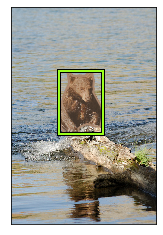

In [10]:
ax = show_img(img)
annIds = coco.getAnnIds(imgIds=[img_data[i]['id']], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
rect(ax, anns[0]['bbox'])